# 00 — Setup and Conventions

Purpose: verify your environment and learn the strict conventions used throughout this repository (seeds, shapes, naming, plotting, and debug discipline).

## Learning goals
- Confirm NumPy + matplotlib work correctly.
- Adopt consistent variable names: `x, y, W, b, z, a, L, lr`.
- Adopt consistent shape conventions (batch-first).
- Build a small plotting toolkit and debug prints used everywhere.

## Prerequisites
- Comfortable running Jupyter notebooks.
- Basic Python and NumPy arrays.
- No prior neural network knowledge required.

## Key ideas
- Reproducibility is a feature: fixed seeds and deterministic synthetic data.
- Shapes are your primary debugging tool.
- Visuals make failures obvious faster than logs.

## Minimal theory
- A neural network is a stack of array operations. Bugs are usually: shape mismatch, broadcasting, or numerical instability.
- We treat each notebook like a production experiment: small, deterministic, observable.

In [3]:
# Fixed seed at the top of every notebook (repository convention)
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
rng = np.random.default_rng(SEED)

print('NumPy version:', np.__version__)
print('Seed:', SEED)

NumPy version: 2.4.1
Seed: 42


## Step-by-step experiments
1. Generate a small 2D dataset (deterministic).
2. Print shapes and basic statistics.
3. Create two plots: scatter + histogram.
4. Adopt helper functions you will reuse mentally in later notebooks (shape prints, simple decision boundary grids).

In [4]:
# 1) Deterministic synthetic data
N = 300
x0 = rng.normal(loc=(-1.0, -0.5), scale=0.6, size=(N//2, 2))
x1 = rng.normal(loc=(+1.0, +0.8), scale=0.6, size=(N//2, 2))
x = np.vstack([x0, x1])
y = np.vstack([np.zeros((N//2, 1)), np.ones((N//2, 1))])

# 2) Shuffle once (still deterministic because rng is seeded)
idx = rng.permutation(N)
x = x[idx]
y = y[idx]

print('x shape:', x.shape)
print('y shape:', y.shape)
print('x mean:', x.mean(axis=0))
print('x std :', x.std(axis=0))
print('y mean (class balance):', y.mean())

x shape: (300, 2)
y shape: (300, 1)
x mean: [-0.01339665  0.13199821]
x std : [1.16312862 0.87924011]
y mean (class balance): 0.5


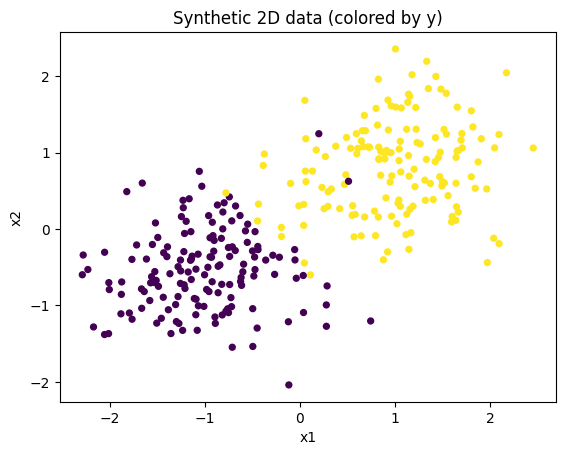

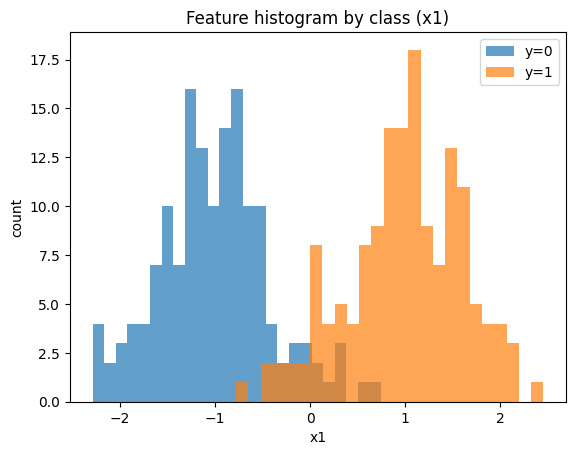

In [7]:
# 3) Plot 1: scatter
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], s=18)
plt.title('Synthetic 2D data (colored by y)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plot 2: histogram of one feature by class
plt.figure()
plt.hist(x[y[:,0]==0, 0], bins=25, alpha=0.7, label='y=0')
plt.hist(x[y[:,0]==1, 0], bins=25, alpha=0.7, label='y=1')
plt.title('Feature histogram by class (x1)')
plt.xlabel('x1')
plt.ylabel('count')
plt.legend()
plt.show()

## Visualizations
You created:
- A 2D scatter plot to see separability.
- A histogram to see feature distributions per class.

Later notebooks will add decision boundaries, loss curves, and calibration/threshold plots.

## Reflection questions
1. What are the exact shapes of `x` and `y`, and why is batch-first a useful rule?
2. If you accidentally used `(N,)` for `y`, what breaks later?
3. Why is it important to shuffle only once per experiment?
4. What would make this dataset harder without changing `N`?
5. Which plot (scatter vs histogram) gave you faster insight here, and why?

## Optional extensions
1. Change `scale` to increase overlap and re-plot.
2. Add a third class by sampling a third cluster.
3. Write a function `train_val_test_split(x, y, ratios, rng)` and verify shapes.